# Project 2: Ames Housing Data & Kaggle Challenge
_Author: Schubert Hervery Laforest (BOS)_

![](https://i0.wp.com/nycdatascience.com/blog/wp-content/uploads/2017/11/neighborhood-puzzle.jpg?w=450&ssl=1)

---

## Project Overview 

For this project, I was tasked with creating a linear regression model based on the Ames Housing Dataset. This model is supposed to predict the price of a house at sale. The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses. The goal will be to find the most pertinent features that will enable us to make accurate predcitions of the target: house **Sale Price**. 

In the context of this project, model selection was made for me: Linear regression was the name of the game. However, the challenge and complexity of the task would lie in cleaning the data, finding and creating pertinent features, and ultimately the best and most accurate model possible. In order to create this regression model, I make use of the following thechniques: 
- Exploratory data analysis to question correlation and relationship across predictive variables
- Train-test split and Cross-validation
- Write code that reproducibly and consistently applies feature transformation
- Experiment with four modeling techniques: Multivariate Linear regression, Ridge Regression, Lasso   Regression and Eleastic Net 

## Notebook Guide
- [EDA and Pre-Processing the Datasets](#prepro)
- [Cleaning the Data](#cleaning)
- [Naive Multivariate Linear Regression (MRL) Attempt](#MLR1)
- [Finding & Creating Features](#feat)
- [MLR Revisited](#MLR2)
- [Ridge Regression](#ridge)
- [Lasso Regression](#lasso)
- [Elastic Net](#enet)
- [Final Thoughts & Conclusion](#ccl)

<a id='prepro'></a>
## EDA & Preprocessing the Datasets

For starters, let's load in the necessary modules, our data, and take a look at what we're dealing with

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# reding in the data 
sample = pd.read_csv('sample_sub_reg.csv')
test = pd.read_csv('test.csv')
data = pd.read_csv('train.csv')

Let's get a feel for the data (in this case, the data we will be trainig our model of off. 

In [3]:
data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [4]:
# getting the info, description, shape, head of train data 
print(data.info())
display(data.head(10))
display(data.tail(5))
print('Data Shape', data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


Data Shape (2051, 81)


In [5]:
# Viewing the nulls in our train data
with pd.option_context("display.max_rows", 100):
    display(data.isnull().sum())

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

In [6]:
# Checking how our varriables are correlated 
data.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas Vnr Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


Now let's get a feel for the test data, the data against which we will be pitting out model for submission to Kaggle

In [7]:
# getting the info, description, shape, head of test data 
print(test.info())
display(test.head(10))
display(test.tail(5))
print('Test Shape', test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
5,333,923228370,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
6,1327,902427150,20,RM,52.0,8516,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,5,2008,WD
7,858,907202130,20,RL,NaN,9286,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,10,2009,WD
8,95,533208090,160,FV,39.0,3515,Pave,Pave,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,1,2010,WD
9,1568,914476010,20,RL,75.0,10125,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,2,2008,WD


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD
878,1939,535327160,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,3,2007,WD


Test Shape (879, 80)


In [8]:
# Viewing the nulls in our test data
with pd.option_context("display.max_rows", 100):
    display(test.isnull().sum())

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [9]:
#spot checking to make sure both train and test data have the same columns (apart from sale price)
test_columns = test.columns
data_columns = data.columns
common_columns = []
for column in test_columns:
    if column in data_columns:
        common_columns.append(column)
len(common_columns)

80

Based on our spot checking, there seems to be quite a lot of cleaning to do. Notably, there are a non-trivial amount of nulls across both data sets, and they appear in both at different rates and in different places. Furthermore, beyond cleaning, there are definately some features we might find interesting to create, namely with regards to the categorical features. For these reasons, we will be concatenating the train and test data, cleaning them as one, creating features from them as one, and then splitting them appart once we get to the modeling process.  

In [10]:
combined_data = data.append(test)

In [11]:
display(combined_data.columns)
display(combined_data.shape)

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Id',
       'Kitchen AbvGr', 'Kitchen Qual', 'Land Contour', 'Land Slope',
       'Lot Area', 'Lot Config', 'Lot Frontage', 'Lot Shape',
       'Low Qual Fin SF', 'MS SubClass', 'MS Zoning', 'Mas Vnr Area',
       'Mas Vnr Type', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Neighborhood',
       

(2930, 81)

<a id='cleaning'></a>
## Cleaning the Data

In [12]:
def clean_df(data):
    """Function that will clean and make necessary transfromations on the
    DataFrame, prepping it for modeling
    """
    # dropping columns w/ >100 nulls & renaming columns for ease of use
    data = data.rename(columns=lambda x: x.replace(' ', '_').lower())
    data = data.rename(columns=lambda x: x.replace('/', '_'))

    # replacing missing values with mode of that column
    missing_vals = ['mas_vnr_area','bsmtfin_sf_1', 'bsmtfin_sf_2','bsmt_unf_sf',
    'total_bsmt_sf','bsmt_full_bath', 'bsmt_half_bath', 'garage_cars',
    'garage_area']
    for column in missing_vals:
        data[column].fillna(data[column].mode()[0], inplace=True)

    # Dropping columns with missing attributes
    text_to_drop = ['bsmt_exposure', 'bsmtfin_type 2','bsmtfin_type 1',
    'bsmt_qual', 'bsmt_cond', 'mas_vnr_type']
    for column in text_to_drop:
        data.drop(column, inplace=True)

    return data

In [13]:
combined_data= clean_df(combined_data)

In [14]:
display(combined_data.columns)
display(combined_data.shape)

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr',
       'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath',
       'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air',
       'condition_1', 'condition_2', 'electrical', 'enclosed_porch',
       'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence',
       'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional',
       'garage_area', 'garage_cars', 'garage_cond', 'garage_finish',
       'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating', 'heating_qc', 'house_style', 'id',
       'kitchen_abvgr', 'kitchen_qual', 'land_contour', 'land_slope',
       'lot_area', 'lot_config', 'lot_frontage', 'lot_shape',
       'low_qual_fin_sf', 'ms_subclass', 'ms_zoning', 'mas_vnr_area',
       'mas_vnr_type', 'misc_feature', 'misc_val', 'mo_sold', 'neighborhood',
       

(2930, 81)

<a id='MLR1'></a>
## Naive Multivariate Linear Regression Attempt 

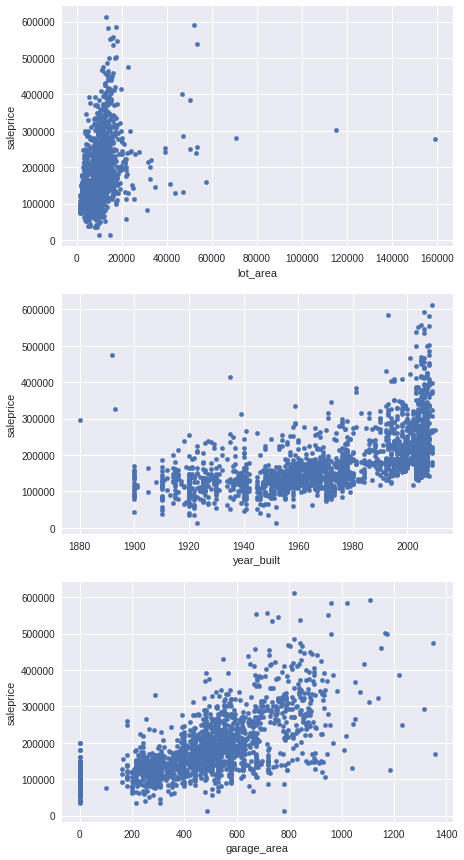

In [87]:
fig = plt.figure(figsize =(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3) 

data.plot(x="lot_area", y="saleprice", ax=ax1, kind="scatter")
data.plot(x="year_built", y="saleprice", ax=ax2, kind="scatter")
data.plot(x="garage_area", y="saleprice", ax=ax3, kind ="scatter");

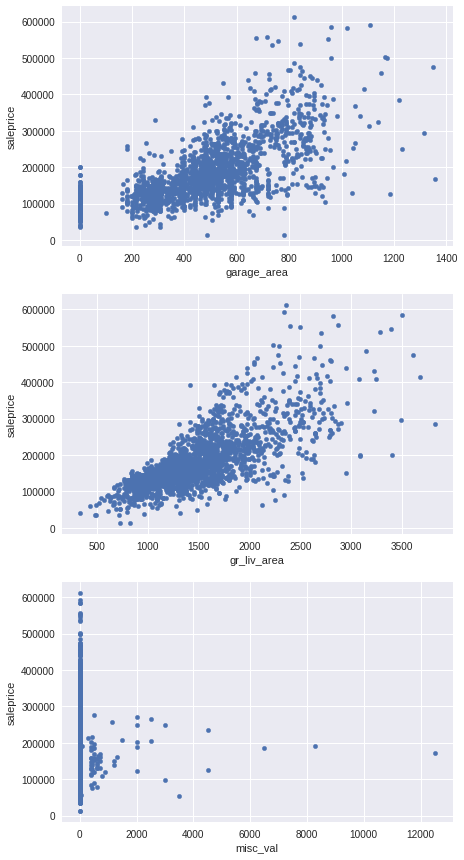

In [91]:
fig = plt.figure(figsize =(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3) 

data.plot(x="garage_area", y="saleprice", ax=ax1, kind="scatter")
data.plot(x="gr_liv_area", y="saleprice", ax=ax2, kind="scatter")
data.plot(x="misc_val", y="saleprice", ax=ax3, kind ="scatter");

In [88]:
# literally just looking at features and guessing 
features1 = ['gr_liv_area', 'garage_area', 'year_built', 'bedroom_abvgr', 'lot_area']
X = data[features1]
y = data['saleprice']
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_)
print(lr.intercept_)

a1 = lr.coef_
a0 = lr.intercept_

print(lr.score(X, y))

[ 1.03716464e+02  7.50786000e+01  7.77981991e+02 -2.03217259e+04
  1.07230727e+00]
-1495912.245917411
0.756241470790554


<a id='feat'></a>
## Finding and Creating Features 

In [15]:
def feature_creation(data):
    """Funtion that will select and/or create desired features from the
    specified DataFrame, and remove outliers
    """
    modernity = data['yr_sold'] - data['year_remod_add']
    data['years_since_update'] = modernity
    data = data.drop(['yr_sold', 'year_remod_add'], axis=1)

    # Creating dummies
    text_columns = data.select_dtypes(include=['object'])
    for column in text_columns:
        data[column] = data[column].astype('category')
        data = pd.concat([data, pd.get_dummies(data.select_dtypes(include=['category']))], axis=1)
        
#     data = pd.concat([data.drop('utilities', axis=1),
#     pd.get_dummies(data['utilities'])], axis=1)

#     data = pd.concat([data.drop('exter_qual', axis=1),
#     pd.get_dummies(data['exter_qual'], prefix='exter_q')], axis=1)

#     data = pd.concat([data.drop('heating_qc', axis=1),
#     pd.get_dummies(data['heating_qc'], prefix='heat_q')], axis=1)
    
    
#     data = pd.concat([data, pd.get_dummies(data['utilities'])], axis=1)
#     data = pd.concat([data, pd.get_dummies(data['exter_qual'], prefix=['exter_q'])], axis=1)
#     data = pd.concat([data, pd.get_dummies(data['heating_qc'], prefix=['heating_qc'])], axis=1)
   

    # Getting rid ouf outliers in data
#     data = data.drop(data.index[data['total_bsmt_sf']>5000])
#     data = data.drop(data.index[data['years_since_update']<0])
#     data = data.drop(data.index[(data['total_bsmt_sf']>5000) &
#     (data['saleprice']<300000)])
#     data = data.drop(data.index[(data['year_built']<1900) &
#     (data['saleprice']<250000)])

    return data

In [16]:
combined_data = feature_creation(combined_data)

In [17]:
combined_data.columns

Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr',
       'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath',
       'bsmt_half_bath',
       ...
       'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth', 'sale_type_VWD',
       'sale_type_WD ', 'street_Grvl', 'street_Pave', 'utilities_AllPub',
       'utilities_NoSeWa', 'utilities_NoSewr'],
      dtype='object', length=5531)

Now that we've created the necessary features, we split the train and test data sets back into their original partitions. 

In [18]:
data = combined_data.iloc[:2051, :]
test = combined_data.iloc[2051:, :]

In [19]:
display(len(test))
display(len(data))

879

2051

Now that we've partioned our data, we can deal with those outliers that we wanted to remove but couldn't due to the `NaN`s in the `combinded_data` sale price column from the test data concatenation. We will also drop any remaing columns with `NaN`s from the test and train datasets. 

In [20]:
# Getting rid ouf outliers in data
data = data.drop(data.index[data['total_bsmt_sf']>5000])
data = data.drop(data.index[data['years_since_update']<0])
data = data.drop(data.index[(data['total_bsmt_sf']>5000) &
(data['saleprice']<300000)])
data = data.drop(data.index[(data['year_built']<1900) &
(data['saleprice']<250000)])

In [21]:
#dropping nulls from both test and train data
data = data.dropna(axis=1)
test = test.dropna(axis=1)

In [22]:
display(len(test))
display(len(data))

879

2032

Features we will be playing with

In [23]:
num_vals = data.select_dtypes(include=[np.float, np.int])
features = num_vals.columns.drop(["saleprice", 'id', 'pid'])
features2 = ['years_since_update','year_built','gr_liv_area','garage_area','mas_vnr_area',
'total_bsmt_sf','bsmtfin_sf_1','wood_deck_sf','lot_area','1st_flr_sf'] #Features lasso didn't run to 0

<a id='MLR2'></a>
## MLR Revisited 

In [24]:
# data.corr()['saleprice'].abs().sort_values(ascending=False)

In [29]:
X = data[features]
y = data['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
random_state=42)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1016, 33) (1016,)
(1016, 33) (1016,)


In [30]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(cross_val_score(LinearRegression(), X_train_scaled, y_train).mean())

lr = LinearRegression()
model = lr.fit(X_train_scaled, y_train)
print(lr.score(X_train_scaled, y_train))

print(lr.score(X_test_scaled, y_test))

-2.7672484953263503e+24
0.8833568664784716
0.8631112448826553


<a id='ridge'></a>
## Ridge Regression (spoiler: best performing model)

In [37]:
# Finding the optimal amounf of folds
for folds in range(5,11):
    print('K:', folds)
    model4 = RidgeCV()
    
    # Cross validating
    scores = cross_val_score(model4, X[features], y, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))
    
    # Cross Validating predictions
    predictions = cross_val_predict(model4, X[features], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2:", r2)

K: 5
Cross-validated scores: [0.83695086 0.8742865  0.88299135 0.88222209 0.86053003]
Mean CV R2: 0.8673961673309847
Std CV R2: 0.017231105269964752
Cross-Predicted R2: 0.8671342468614163
K: 6
Cross-validated scores: [0.84288481 0.87267151 0.88061956 0.88270352 0.87354083 0.86712888]
Mean CV R2: 0.8699248515924317
Std CV R2: 0.01314832993991598
Cross-Predicted R2: 0.8697919448339753
K: 7
Cross-validated scores: [0.83092667 0.86419971 0.89330763 0.88326304 0.88034637 0.87055296
 0.86714083]
Mean CV R2: 0.8699624577843569
Std CV R2: 0.018497260884195958
Cross-Predicted R2: 0.8699071997899562
K: 8
Cross-validated scores: [0.81947127 0.87203932 0.87879846 0.89141764 0.87470728 0.88088914
 0.8688621  0.86885711]
Mean CV R2: 0.8693802915449536
Std CV R2: 0.020105036433960184
Cross-Predicted R2: 0.8692980214587844
K: 9
Cross-validated scores: [0.81856993 0.86289365 0.88823681 0.88326461 0.87209565 0.8932306
 0.88398782 0.84578918 0.88736814]
Mean CV R2: 0.8706040438366198
Std CV R2: 0.0231620

In [48]:
ridge = Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
model2 = ridge.fit(X_train_scaled, y_train)  
ridge_score = cross_val_score(ridge,X_train_scaled, y_train, cv = 9, scoring = 'r2')

In [49]:
ridge_score.mean()

0.867143621545993

In [50]:
#checking the coeficients 
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef': ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs

,abs_coef,coef,variable
25,19702.085660,19702.085660,overall_qual
14,15192.681828,15192.681828,gr_liv_area
3,10647.950074,-10647.950074,bedroom_abvgr
28,9995.156234,9995.156234,totrms_abvgrd
1,9832.003316,9832.003316,2nd_flr_sf
31,8920.244499,8920.244499,year_built
29,8846.795833,8846.795833,total_bsmt_sf
7,8703.709480,8703.709480,bsmtfin_sf_1
0,8135.714456,8135.714456,1st_flr_sf
32,7903.498842,-7903.498842,years_since_update


<a id='lasso'></a>
## Lasso Regression

In [51]:
# Finding the optimal amount of folds
for folds in range(5,11):
    print('K:', folds)
    model4 = LassoCV()
    
    # Cross Validating
    scores = cross_val_score(model, X[features], y, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))
    
    # Cross Validating predictions
    predictions = cross_val_predict(model, X[features], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2:", r2)

K: 5
Cross-validated scores: [0.83709245 0.87430866 0.88289606 0.8817952  0.86037081]
Mean CV R2: 0.8672926366449014
Std CV R2: 0.017105429040384687
Cross-Predicted R2: 0.8670343966292633
K: 6
Cross-validated scores: [0.84303113 0.87263566 0.88062553 0.88259262 0.87337896 0.86687461]
Mean CV R2: 0.8698564191111591
Std CV R2: 0.01308182142655055
Cross-Predicted R2: 0.8697213980569919
K: 7
Cross-validated scores: [0.83103402 0.86427171 0.89333829 0.88313568 0.88029011 0.87042028
 0.86691678]
Mean CV R2: 0.8699152665185246
Std CV R2: 0.01845419911008703
Cross-Predicted R2: 0.8698573203467621
K: 8
Cross-validated scores: [0.81956604 0.87219976 0.87888373 0.89127687 0.8745214  0.88091168
 0.86873697 0.86854341]
Mean CV R2: 0.8693299822658431
Std CV R2: 0.020061414743474722
Cross-Predicted R2: 0.869241870899774
K: 9
Cross-validated scores: [0.81868415 0.86302399 0.88832393 0.88328852 0.87176157 0.89331896
 0.88379952 0.84588008 0.88682091]
Mean CV R2: 0.8705446255031684
Std CV R2: 0.02307880

In [53]:
lasso = LassoCV()
model3 = lasso.fit(X_train, y_train)
lasso_score = cross_val_score(lasso, X_train_scaled, y_train, cv = 9, scoring='r2')

In [54]:
lasso_score.mean()

0.8680213658061101

In [56]:
lasso_coefs = pd.DataFrame({'variable':X.columns,
                            'coef': lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lasso_coefs.head(20)

,abs_coef,coef,variable
32,355.986570,-355.986570,years_since_update
31,223.312953,223.312953,year_built
14,66.244566,66.244566,gr_liv_area
12,62.962092,62.962092,garage_area
20,48.075422,48.075422,mas_vnr_area
29,40.319310,40.319310,total_bsmt_sf
7,22.922198,22.922198,bsmtfin_sf_1
30,9.738147,9.738147,wood_deck_sf
17,0.548817,0.548817,lot_area
0,0.023720,0.023720,1st_flr_sf


<a id='enet'></a>
## Elastic Net

In [61]:
# Finding the optimal amount of folds
for folds in range(5,11):
    print('K:', folds)
    model4 = ElasticNetCV()
    
    # Cross Validation
    scores = cross_val_score(model, X[features], y, cv=folds)
    print("Cross-validated scores:", scores)
    print("Mean CV R2:", np.mean(scores))
    print('Std CV R2:', np.std(scores))
    
    # Cross Validating predictions
    predictions = cross_val_predict(model, X[features], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print("Cross-Predicted R2:", r2)

K: 5
Cross-validated scores: [0.83709245 0.87430866 0.88289606 0.8817952  0.86037081]
Mean CV R2: 0.8672926366449014
Std CV R2: 0.017105429040384687
Cross-Predicted R2: 0.8670343966292633
K: 6
Cross-validated scores: [0.84303113 0.87263566 0.88062553 0.88259262 0.87337896 0.86687461]
Mean CV R2: 0.8698564191111591
Std CV R2: 0.01308182142655055
Cross-Predicted R2: 0.8697213980569919
K: 7
Cross-validated scores: [0.83103402 0.86427171 0.89333829 0.88313568 0.88029011 0.87042028
 0.86691678]
Mean CV R2: 0.8699152665185246
Std CV R2: 0.01845419911008703
Cross-Predicted R2: 0.8698573203467621
K: 8
Cross-validated scores: [0.81956604 0.87219976 0.87888373 0.89127687 0.8745214  0.88091168
 0.86873697 0.86854341]
Mean CV R2: 0.8693299822658431
Std CV R2: 0.020061414743474722
Cross-Predicted R2: 0.869241870899774
K: 9
Cross-validated scores: [0.81868415 0.86302399 0.88832393 0.88328852 0.87176157 0.89331896
 0.88379952 0.84588008 0.88682091]
Mean CV R2: 0.8705446255031684
Std CV R2: 0.02307880

In [63]:
# elastic net
elastic_alphas = np.arange(0.5, 1.0, 0.005)
elastic_ratio = 0.5
elastic_model = ElasticNetCV(alphas=elastic_alphas, l1_ratio=elastic_ratio, cv=9)
elastic_model = elastic_model.fit(X_train, y_train)
print("Score:", elastic_model.score(X_test, y_test))

Score: 0.8611364263399903


In [65]:
elastic_coefs = pd.DataFrame({'variable':X.columns,
                            'coef': elastic_model.coef_,
                            'abs_coef':np.abs(elastic_model.coef_)})

elastic_coefs.sort_values('abs_coef', inplace=True, ascending=False)

elastic_coefs.head(20)

,abs_coef,coef,variable
25,11359.308682,11359.308682,overall_qual
3,7873.256469,-7873.256469,bedroom_abvgr
28,2904.931337,2904.931337,totrms_abvgrd
24,2544.902908,2544.902908,overall_cond
10,1904.283018,1904.283018,fireplaces
15,1508.473631,-1508.473631,half_bath
16,1417.937823,-1417.937823,kitchen_abvgr
11,969.304139,-969.304139,full_bath
13,742.004116,-742.004116,garage_cars
32,457.895881,-457.895881,years_since_update


In [ ]:
# preds = model2.predict(test[features])
# len(preds)

In [ ]:
# def submissions(preds):
#     preds = pd.DataFrame(preds)
#     test['id'] = test['id'].astype(int) 
#     submission = pd.concat([test['id'], preds], axis=1)
#     submission.columns = ['id', 'saleprice']
#     return submission.to_csv('submitthislast.csv', index=False)

<a id='ccl'></a>
## Final Thoughts & Conclusion 

From now on, will only be using Adjusted R2 as a scoring metric for model evaluation as opposed to just R2. It's misleading to a certain extent and doesn't penalize additional variables. Lasso seemed to be a bit too agressive an approach, and Ridge Seemed to perform the best. One thing I also could have done but hadn't fully learned yet at the time of this project, was gridsearch for the optimal alpha.. 